## TP2 - Face Detection

Pierre-Louis Guhur

# 1. Harmonic Function Solution

**1.1 Complete `hard_hfs` and `two_moons_hfs`. Select uniformly at random 4 labels (S), and compute the labels for the unlabeled nodes (T) using the hard-HFS formula. Plot the resulting labeling and the accuracy.**

Accuracy: 82.00%


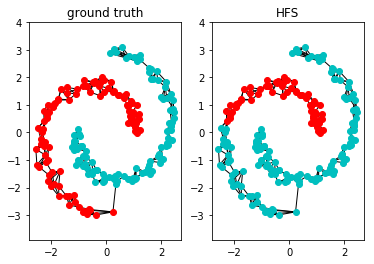

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from code_material_python.hfs import *
    
print(f"Accuracy: {two_moons_hfs()*100:.2f}%")

To tune the similarity graph, `knn` is more appropriate as the links are anisotropics. The minimal value of `k` for which each moon is fully connected is chosen.

***1.2* At home, run two_moons_hfs.m using the data_2moons_large. mat, a dataset with 1000 samples. Continue to uniformly sample only 4 labels. What can go wrong?**

Two things can go wrong.

**First**, it might happen that the 4 labels are inside the same moon. In this case, we have only labels about one manifold and the two moons are considered to be the same. That is why, I modified `mask_labels` to check that each class is at least labelled one time.

![All labels are in the same moon](same_moon.png "All labels are in the same moon")

Accuracy: 89.00%


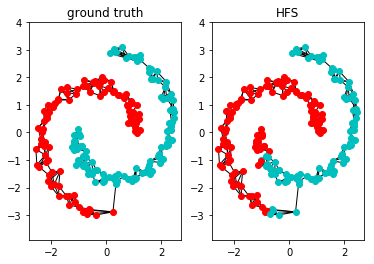

In [2]:
print(f"Accuracy: {two_moons_hfs()*100:.2f}%")

**Secondly**, the two moons are connected. As a consequence, when a labelled point is close to the junction, it might jump into the second moon, and thus, breaking the clustering:

![Example of broken clustering](breaking_clustering.png "Example of a broken clustering due to a too close junction")

One solution is to remove the junction by using an $\epsilon$-thresholding, which can be more finely tuned than `knn` to improve the performance:

Accuracy: 100.00%


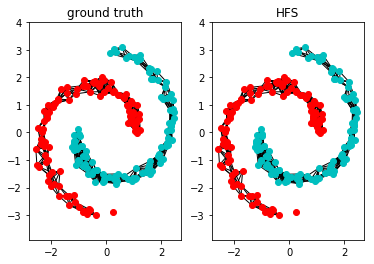

In [3]:
print(f"Accuracy: {two_moons_hfs(k=0, eps=0.7)*100:.2f}%")

Finally, we can test the scaling of the algorithm to a large dataset:

0.837

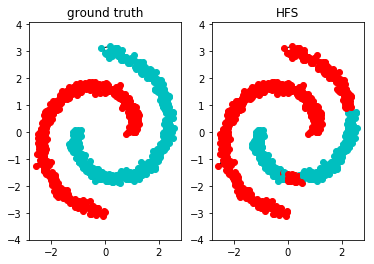

In [4]:
two_moons_hfs("./code_material_python/data/data_2moons_hfs_large")

**What happens when the labels are noisy, or in other words when some of the samples are mislabeled?**

With an hard HFS, the labels are assumed to be noise-less. Otherwise, the algorithm forces the cluster to follow the mislabeled, which engenders wrong results.

In the following code, the noisy points can be seen in the ground truth plot.

Accuracy: 79.50%


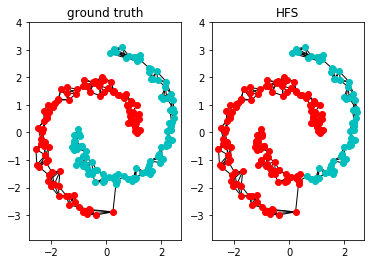

In [5]:
print(f"Accuracy: {two_moons_hfs(noise=True)*100:.2f}%")

***1.3.* Complete `soft_hfs` and test it with `two_moons_hfs`. Now complete `hard_vs_soft_hfs`. Compare the results you obtain with soft-HFS anc hard-HFS.**

Accuracy: 88.50%


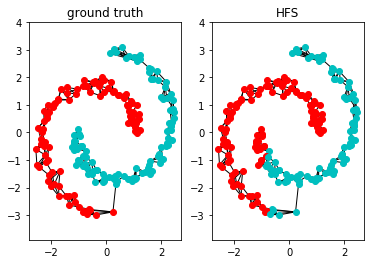

In [6]:
print(f"Accuracy: {two_moons_hfs()*100:.2f}%")

Comparison from Hard HFS and Soft HFS

Hard HFS - Accuracy: 100.00%
Soft HFS - Accuracy: 100.00%


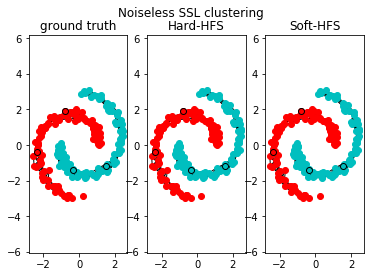

Hard HFS - Accuracy: 0.50%
Soft HFS - Accuracy: 1.50%


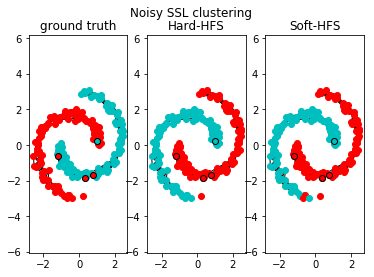

In [7]:
acc = hard_vs_soft_hfs(k=0, eps=0.7) 
print(f"Hard HFS - Accuracy: {acc[0]*100:.2f}%")
print(f"Soft HFS - Accuracy: {acc[1]*100:.2f}%")
fig = plt.gcf()
fig.suptitle('Noiseless SSL clustering')
plt.show()

acc = hard_vs_soft_hfs(noise=True, k=0, eps=0.7, c_u=1, c_l=1) 
print(f"Hard HFS - Accuracy: {acc[0]*100:.2f}%")
print(f"Soft HFS - Accuracy: {acc[1]*100:.2f}%")
fig = plt.gcf()
fig.suptitle('Noisy SSL clustering')
plt.show()

Tuning $c_u$ and $c_l$ is hard. Hard-HFS means that $c_u =0$ and $c_l = \infty$. But when the noise is important (here $p=0.5$), it makes more sense to have $c_u=c_l=1$. In practive, it slightly improves the results.

When the data are noiseless, Soft-HFS perfoms slighlty less good than Hard-HFS.


# 2 Face recognition with HFS

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/pierre-louis/src/MVA/GraphsInML/TP2/code_material_python/hfs.py:57: RuntimeWarning: divide by zero encountered in reciprocal
  D = np.diag(d ** (-1))
/Users/pierre-louis/src/MVA/GraphsInML/TP2/code_material_python/hfs.py:57: RuntimeWarning: overflow encountered in reciprocal
  D = np.diag(d ** (-1))


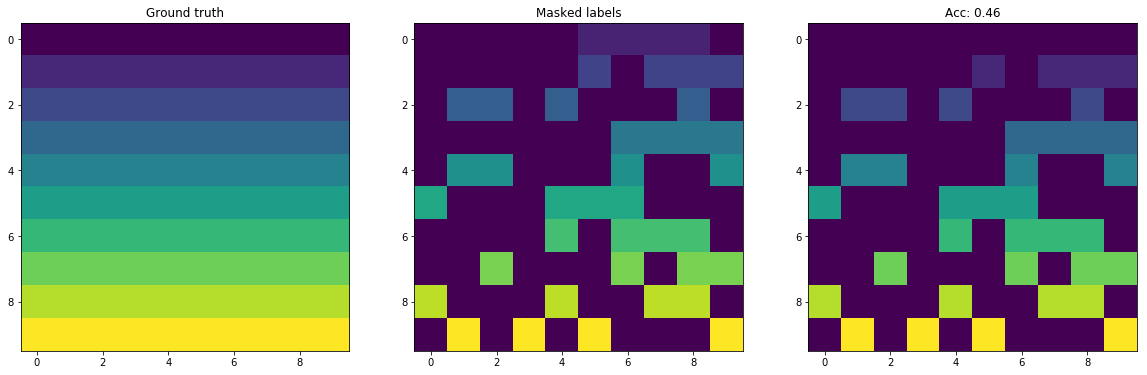

0.46

In [9]:
%load_ext autoreload
%autoreload 2
from code_material_python.hfs import *
from code_material_python.face_detection import *

print('Filter)
offline_face_recognition(n_pers=10, n_im=10, k=10, filter_method="Gaussian")

print('Filter = bilinear')
offline_face_recognition(n_pers=10, n_im=10, k=10, filter_method="Gaussian")


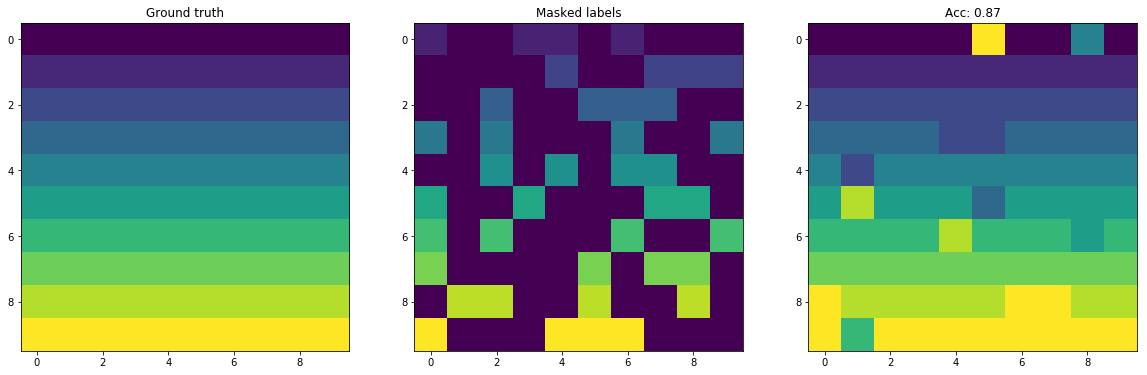

0.87

In [13]:
offline_face_recognition(plot_the_dataset=False, frame_size=96, \
                         n_pers=10, n_im=10, k=10, gamma=0.95, lap="rw",\
                         var=1e5, brightness=200, viz=True)

***2.1.* How did you manage to label more than two classes?**

I manage it by using hot-vector encoding.

***2.2* Which preprocessing steps (e.g. cv.GaussianBlur, cv.equalizeHist) did you apply to the faces before constructing the similarity graph? Which gave the best performance?**

Brightness enhancing has strongly improved results. 

First, we use Gaussian blur.

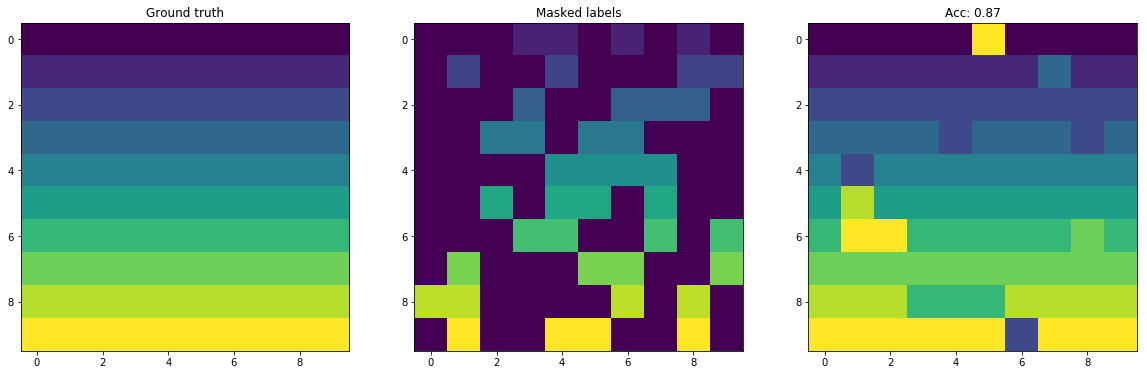

0.87

In [16]:
offline_face_recognition(n_pers=10, n_im=10, var=1e5, k=10, brightness=200, filter_method="Gaussian")

Secondly, the box filtering:

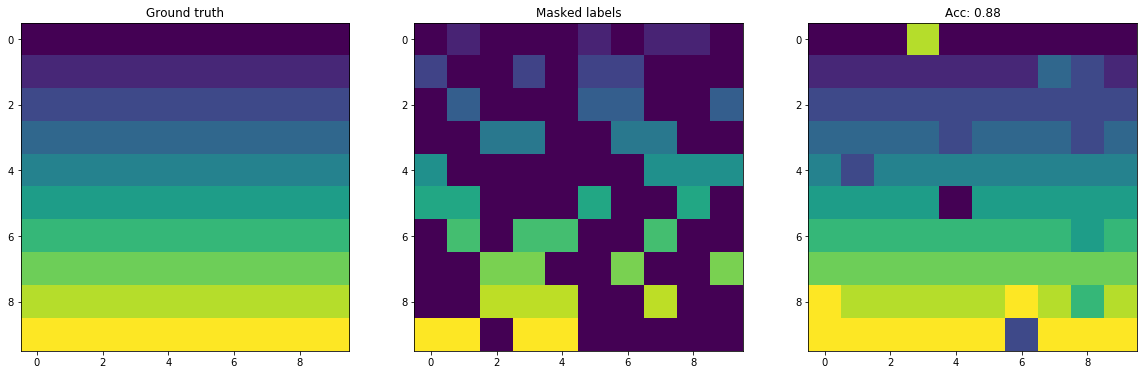

0.88

In [15]:
offline_face_recognition(n_pers=10, n_im=10, var=1e5, k=10, brightness=200, filter_method="box")

Finally, the bilinear filtering:

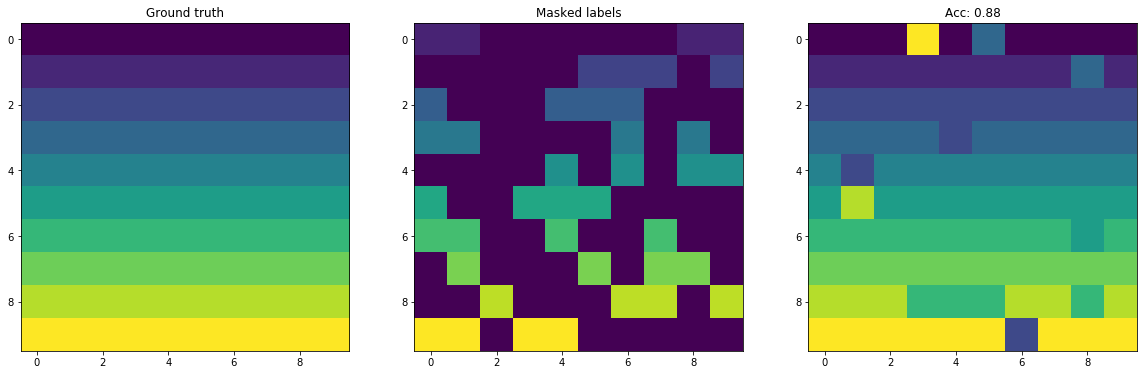

0.88

In [17]:
offline_face_recognition(n_pers=10, n_im=10, var=1e5, k=10, brightness=200, filter_method="bilinear")

Consequently, the results are very similar.


**2.3. Does HFS reach good performances on this task?**

HFS succeeded to cluster all sets. It fails when the head is rotated but not such faces are present in the labelled images.

**2.4. Did adding more data to the task improve performance? If so, which kind of additional data improves performance.**

Globally, the results are similar.

New data could mean more variation in the rotation of the face. When labelled images catch these different rotations, results are strongly more robust. 

Moreover, using an SSL framework means that adding more unlabelled images can also improve performances because more data are connected together. Hence, we can recognize a face that is far from the labelled faces when intermediate faces are present.

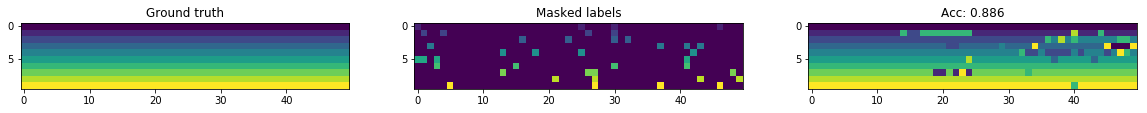

0.886

In [19]:
offline_face_recognition(n_pers=10, n_im=50, var=1e5, k=10, \
                         brightness=200, filter_method="bilinear", \
                         extended=True,
                         data='extended_dataset/')

**2.5. If the performance does not improve when adding additional data, try to justify why. Which kind of additional data degrades performance instead of improving it?**

The benefices from the SSL framework could also be damaging. In the latter results, we can find a continuous set of mislabelled images from the set #1 (green strip instead of a blue strip). Indeed, the algorithm made a first error and it has accumulated errors from that point.